In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
%run -i financial_sector_functions.py

/home/luke/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
def return_function(df):
    if type(df)!=pd.DataFrame:
        df = pd.DataFrame(df)
    out_df = (df.shift(-1)-df)/df
    return out_df

In [5]:
data = pd.read_csv("financial_sector_clean_return_space.csv")
data.index = pd.DatetimeIndex(data.iloc[:,[0]].values.flatten())
data = data.iloc[:,1:]

In [6]:
sp500 = pd.read_csv('/home/luke/workspace/Sector-Analysis/data/CFRM521_final_project/SPX500.csv')
sp500.index = pd.DatetimeIndex(sp500.iloc[:,[0]].values.flatten())
sp500 = sp500.iloc[:,[1]]
sp500 = return_function(sp500)

In [7]:
sector_return = data.iloc[:,[0]]
x_data = pd.concat([data.iloc[:,1:],sp500],1)
sector_return,x_data = model_data(sector_return,x_data)

In [8]:
x = x_data
y = sector_return
linear = sm.OLS(y, x)
results = linear.fit()

y_predict = pd.DataFrame(results.predict(x),index = x.index)
metric_value = evaluate_metric(y,y_predict,'r2')
print(metric_value)

0.814935878103


In [9]:
x_data.columns

Index([u'GDP', u'DGS10', u'TEDRATE', u'YIELD_SLOPE', u'PAYEMS', u'VIXCLS',
       u'CSUSHPINSA', u'RECPROUSM156N', u'UNRATE', u'FEDFUNDS', u'PCE',
       u'BAMLH0A0HYM2', u'NETEXP', u'UMCSENT', u'XAU Curncy', u'XOI Index',
       u'ACILOB', u'CCSA', u'DXY Curncy', u'JTU5200JOR', u'LUGCTRUU Index',
       u'LUMSTRUU Index', u'M2 Index', u'TAIEALLGCLCRT100EP', u'SPX Index'],
      dtype='object')

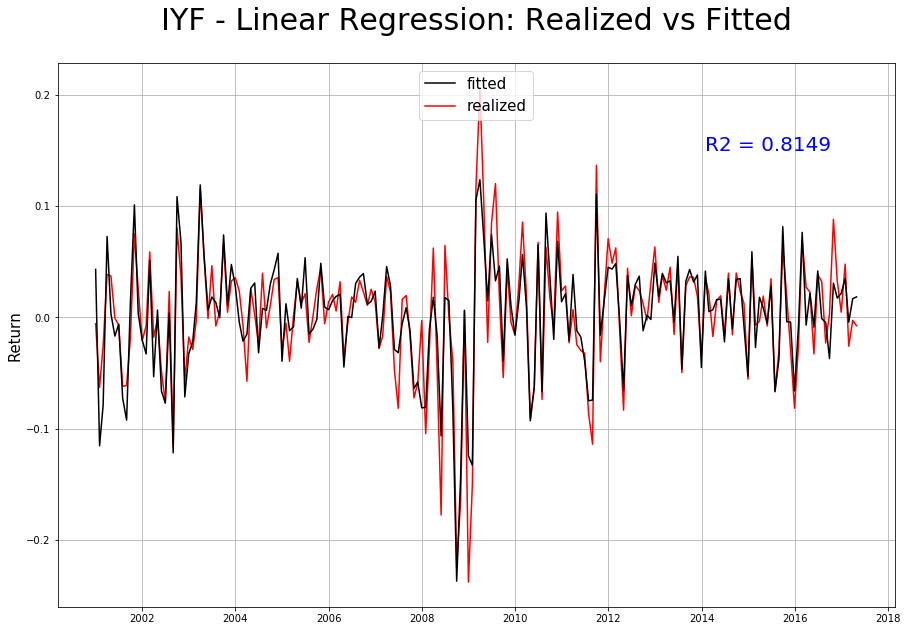

In [10]:
plt.figure(figsize = (15,10))
ttl = plt.title("IYF - Linear Regression: Realized vs Fitted",size = 30)
ttl.set_position([.5, 1.05])
real,=plt.plot(y,'r-')
fit,=plt.plot(y_predict,'k-')
plt.text(y.index[-40],0.15,'R2 = '+str(round(metric_value,4)),size=20,color='b')
plt.legend([fit,real],['fitted','realized'],loc=9,fontsize=15)
plt.ylabel("Return",size=15)
plt.grid()
plt.savefig('linear_regression_additional_data.png',bbox_inches='tight')
plt.show()


In [11]:
econ_data = pd.read_csv("fin_clean_only_econ.csv")
econ_data.index = pd.DatetimeIndex(econ_data.iloc[:,[0]].values.flatten())
econ_data = econ_data.iloc[:,1:]
econ_data.columns

Index([u'IYF US Equity', u'GDP', u'DGS10', u'TEDRATE', u'YIELD_SLOPE',
       u'PAYEMS', u'VIXCLS', u'CSUSHPINSA', u'RECPROUSM156N', u'UNRATE',
       u'FEDFUNDS', u'PCE', u'BAMLH0A0HYM2', u'NETEXP', u'UMCSENT',
       u'XAU Curncy', u'XOI Index'],
      dtype='object')

In [12]:
sector_return = econ_data.iloc[:,[0]]
econ_x_data = pd.concat([econ_data.iloc[:,1:],sp500],1)
sector_return,econ_x_data = model_data(sector_return,x_data)

In [13]:
x = econ_x_data
y = sector_return
linear = sm.OLS(y, x)
results = linear.fit()

y_predict = pd.DataFrame(results.predict(x),index = x.index)
metric_value = evaluate_metric(y,y_predict,'r2')
print(metric_value)

0.814935878103


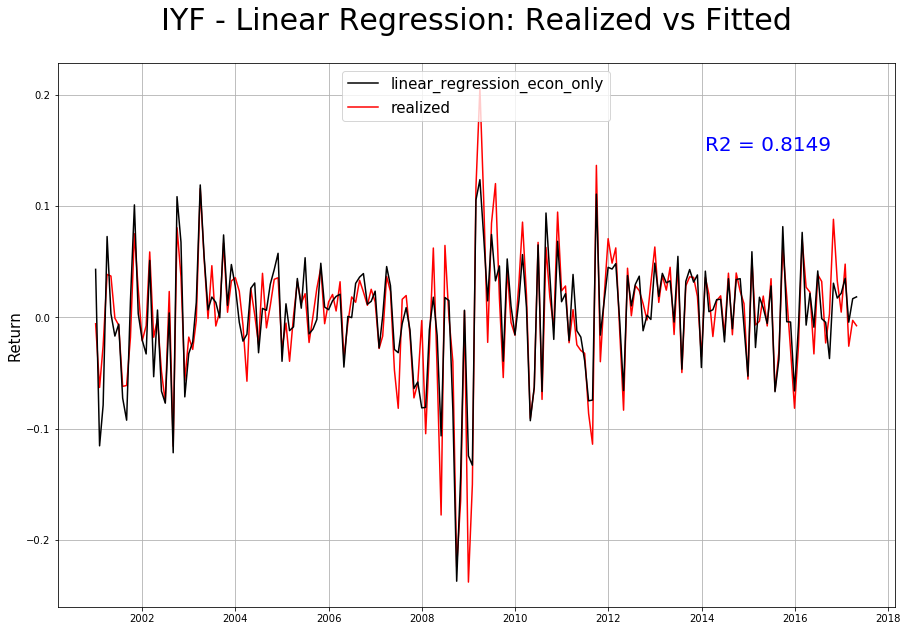

In [14]:
plt.figure(figsize = (15,10))
ttl = plt.title("IYF - Linear Regression: Realized vs Fitted",size = 30)
ttl.set_position([.5, 1.05])
real,=plt.plot(y,'r-')
fit,=plt.plot(y_predict,'k-')
plt.text(y.index[-40],0.15,'R2 = '+str(round(metric_value,4)),size=20,color='b')
plt.legend([fit,real],['linear_regression_econ_only','realized'],loc=9,fontsize=15)
plt.ylabel("Return",size=15)
plt.grid()
plt.savefig('foo2.png',bbox_inches='tight')
plt.show()
